In [ ]:
import tensorflow as tf
from tensorflow import keras 
print(tf.keras.__version__)

2.3.0-tf


In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import initializers
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

In [ ]:
mnist = keras.datasets.mnist 
(images_train, _ ), (_ , _ ) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
images_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
print(images_train.shape)

(60000, 28, 28)


In [ ]:
images_train = (np.array(images_train).astype('float32') - 127.5) / 127.5
images_train = images_train.reshape(60000,784)

In [ ]:
images_train.shape

(60000, 784)

In [ ]:
randomDim = 100
adam = Adam(lr=0.0002,beta_1=0.5)

In [ ]:

generator=Sequential()
generator.add(Dense(256,input_dim=randomDim, kernel_initializer= initializers.RandomNormal(stddev=0.02)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784, activation='tanh'))
generator.compile(loss='binary_crossentropy', optimizer= adam)

In [ ]:
discriminator=Sequential()
discriminator.add(Dense(1024,input_dim=784,kernel_initializer= initializers.RandomNormal(stddev=0.02)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer= adam)

In [ ]:
discriminator.trainable=False
gan_input = Input(shape=(randomDim,))
x = generator(gan_input)
gan_output= discriminator(x)
gan= Model(inputs=gan_input, outputs=gan_output)
gan.compile(loss='binary_crossentropy', optimizer=adam)
gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 784)               1486352   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


In [ ]:
def plot_generated_images(epoch, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest',cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image_epoch_%d.png' %epoch)

--------------- Epoch 1 ---------------
--------------- Epoch 2 ---------------
--------------- Epoch 3 ---------------
--------------- Epoch 4 ---------------
--------------- Epoch 5 ---------------
--------------- Epoch 6 ---------------
--------------- Epoch 7 ---------------
--------------- Epoch 8 ---------------
--------------- Epoch 9 ---------------
--------------- Epoch 10 ---------------
--------------- Epoch 11 ---------------
--------------- Epoch 12 ---------------
--------------- Epoch 13 ---------------
--------------- Epoch 14 ---------------
--------------- Epoch 15 ---------------
--------------- Epoch 16 ---------------
--------------- Epoch 17 ---------------
--------------- Epoch 18 ---------------
--------------- Epoch 19 ---------------
--------------- Epoch 20 ---------------
--------------- Epoch 21 ---------------
--------------- Epoch 22 ---------------
--------------- Epoch 23 ---------------
--------------- Epoch 24 ---------------
--------------- Epoch 25 

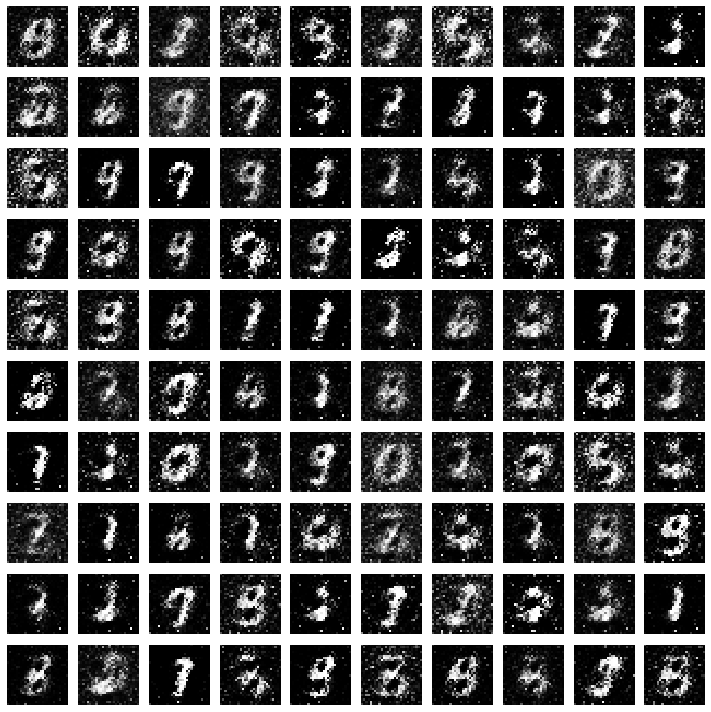

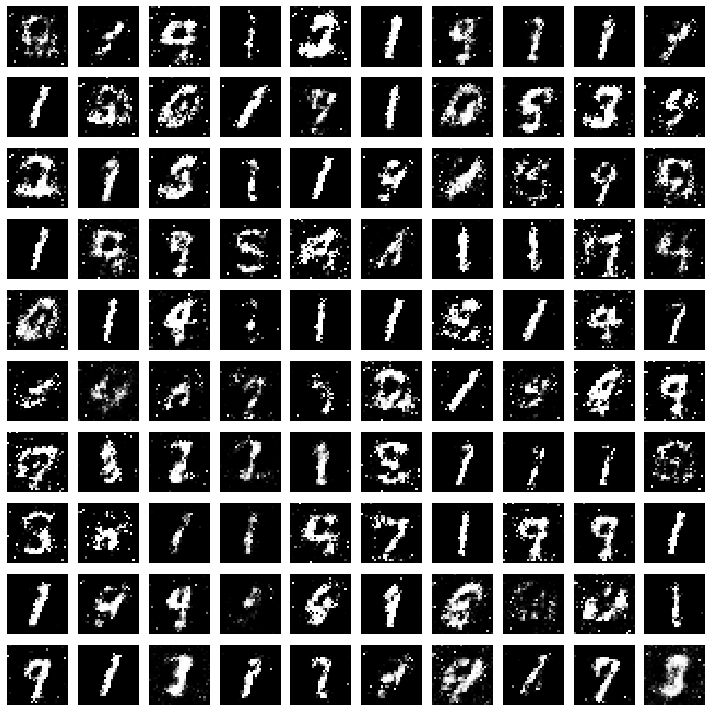

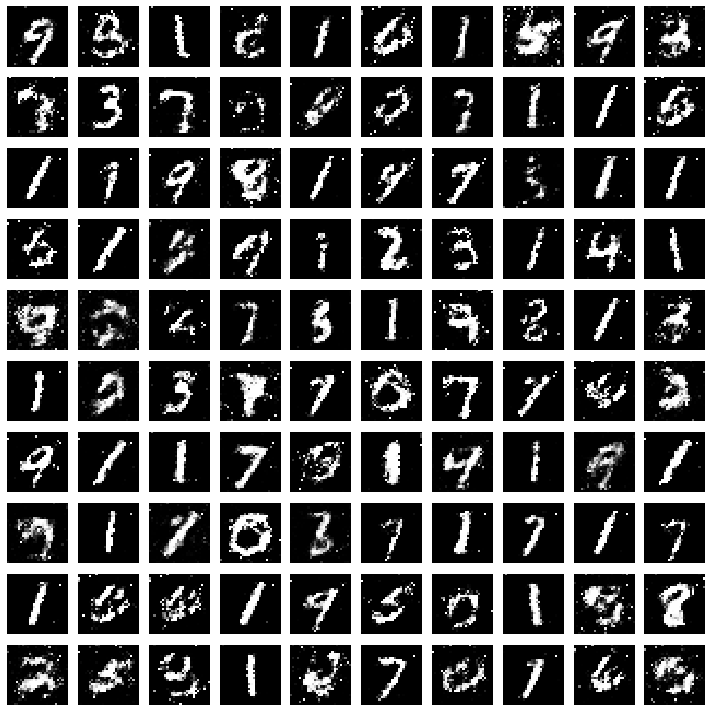

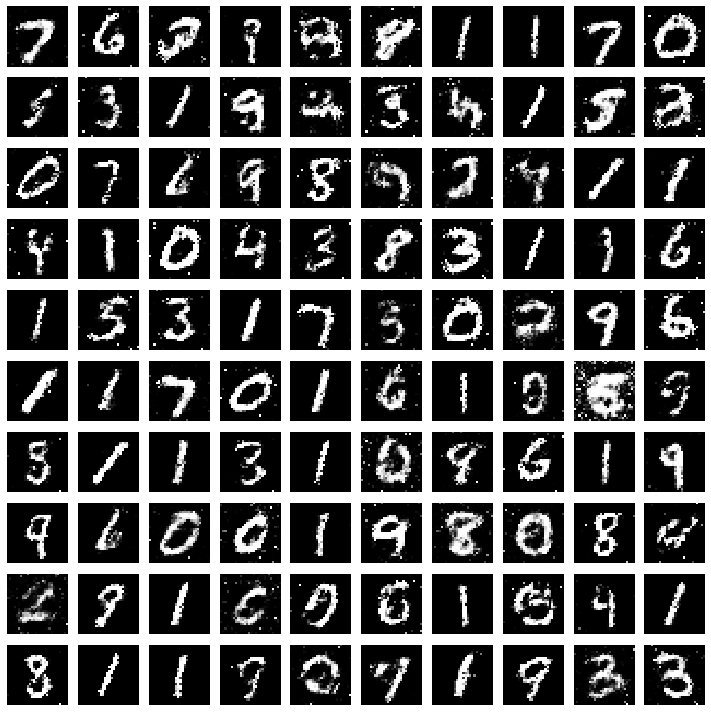

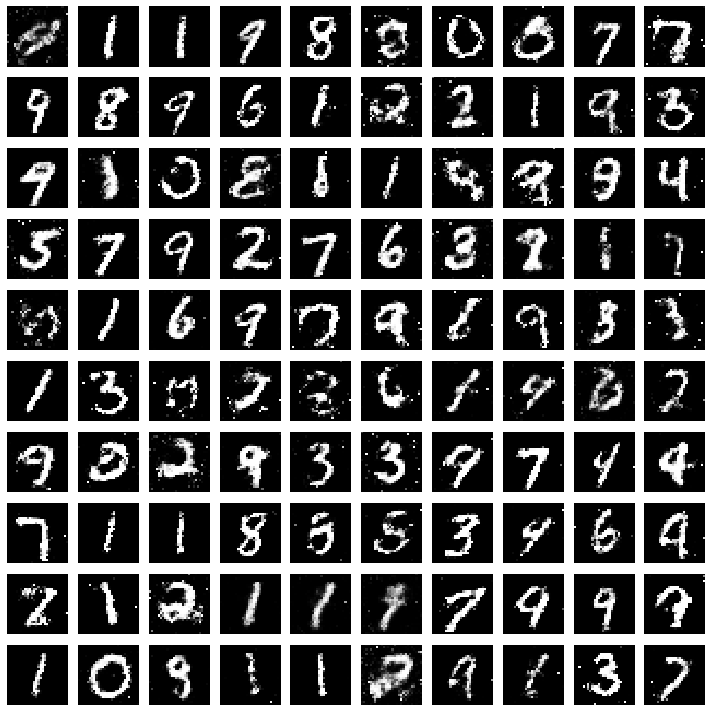

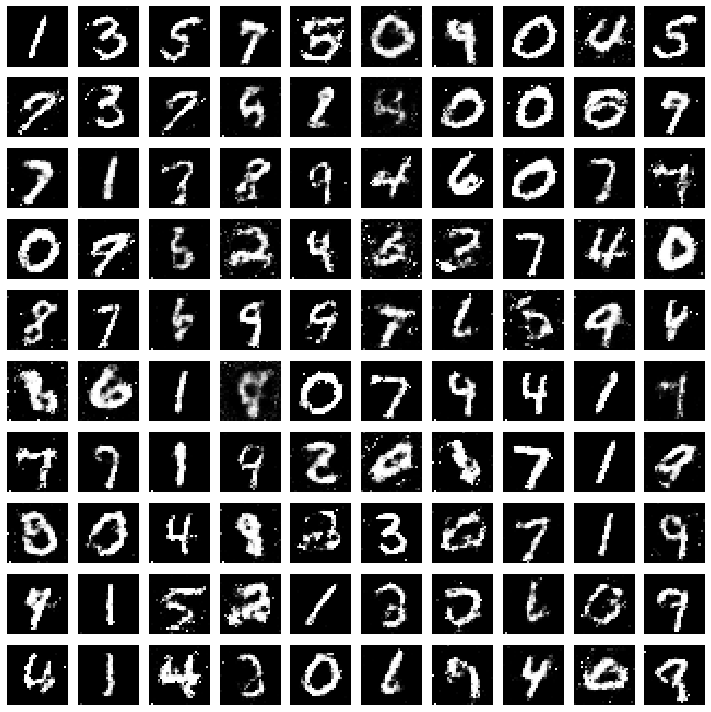

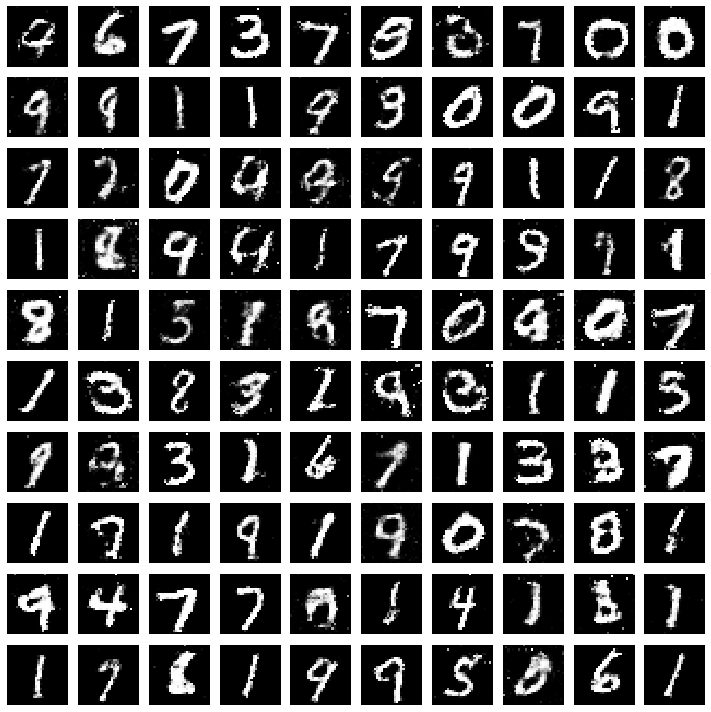

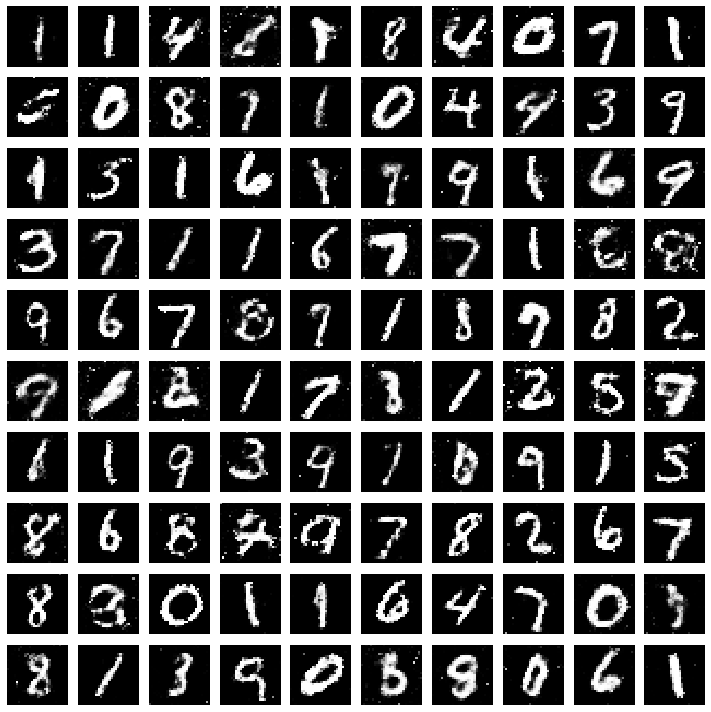

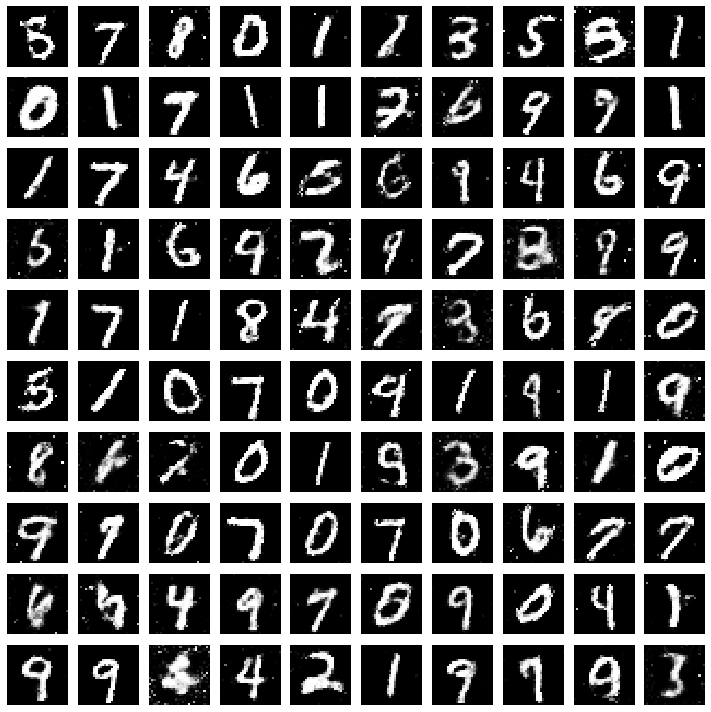

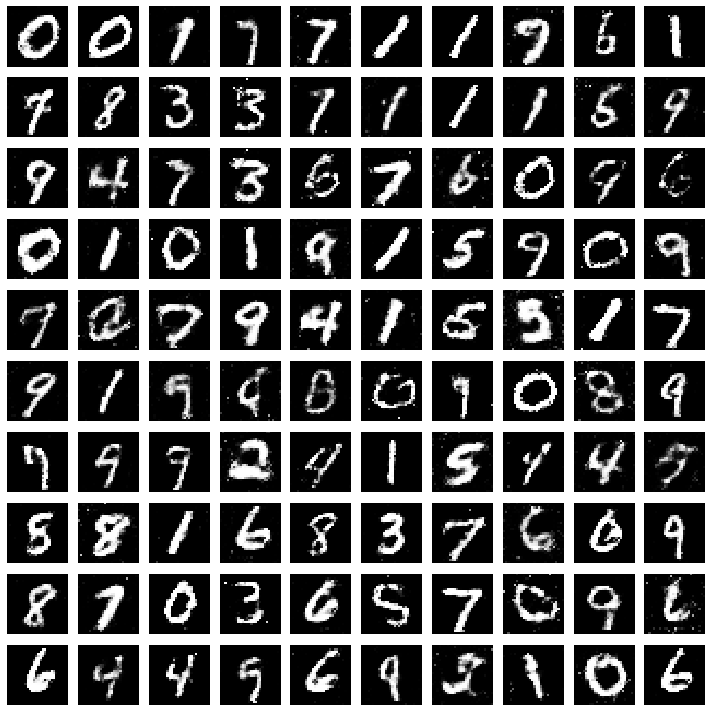

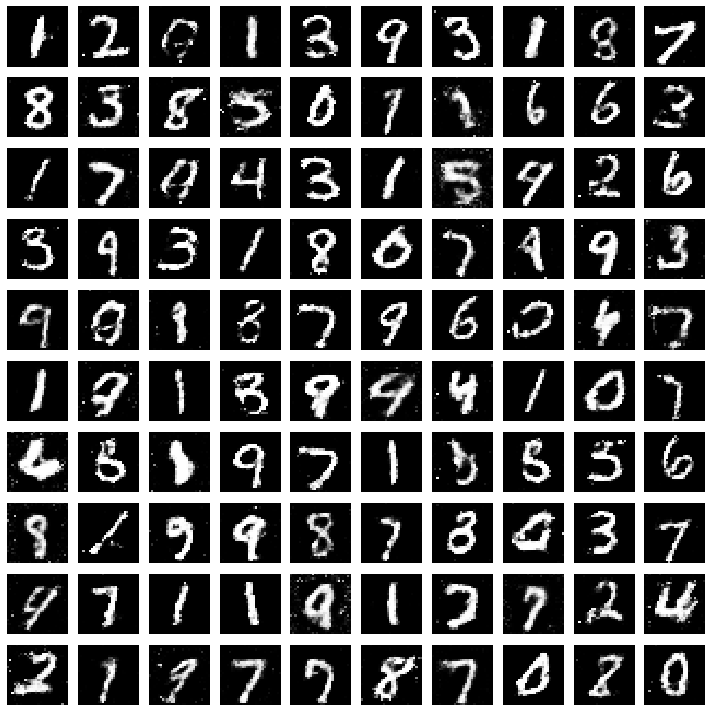

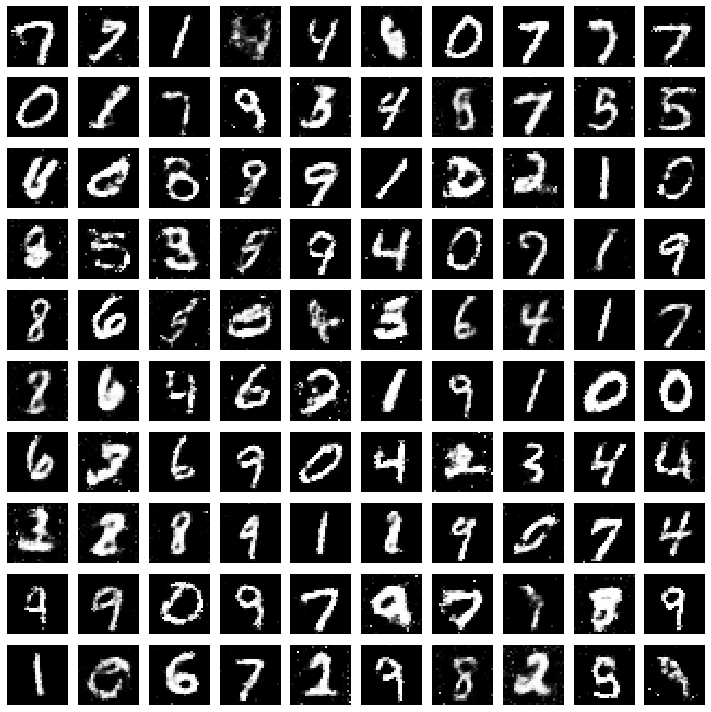

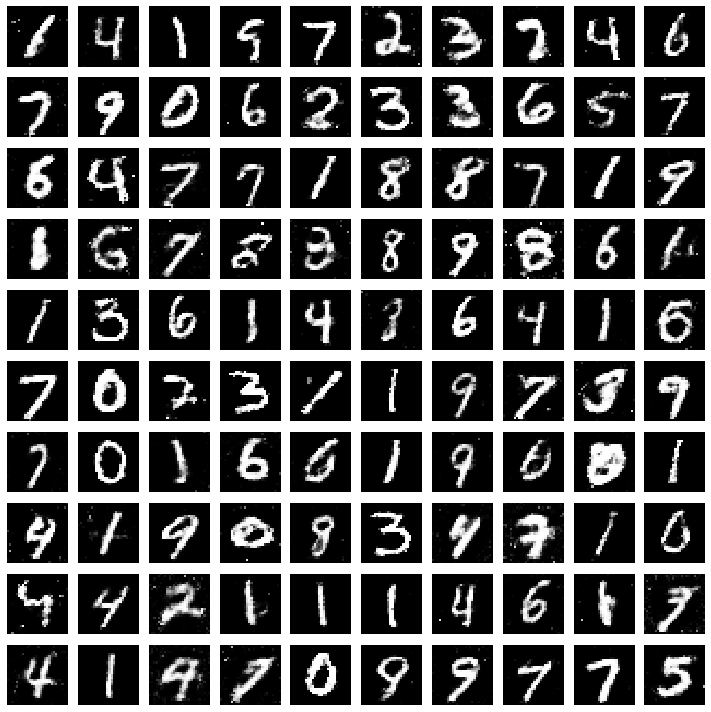

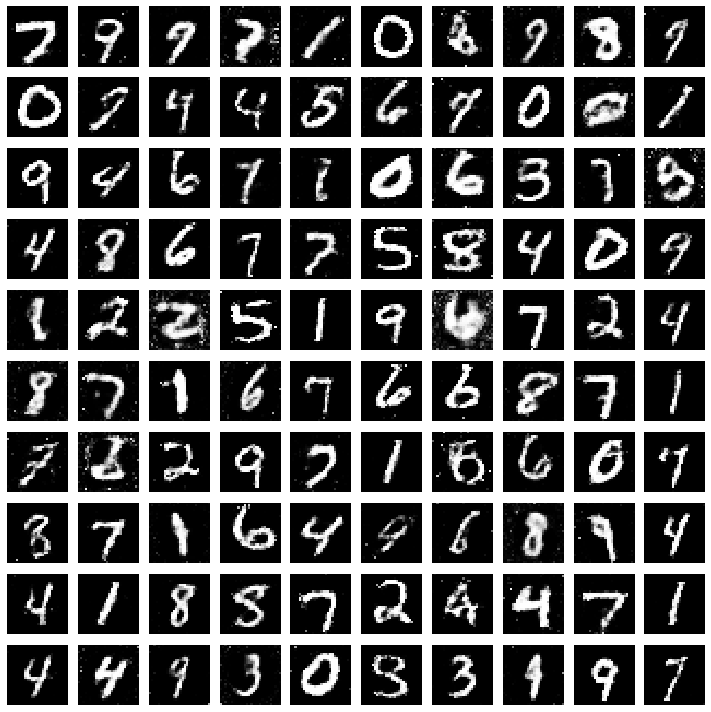

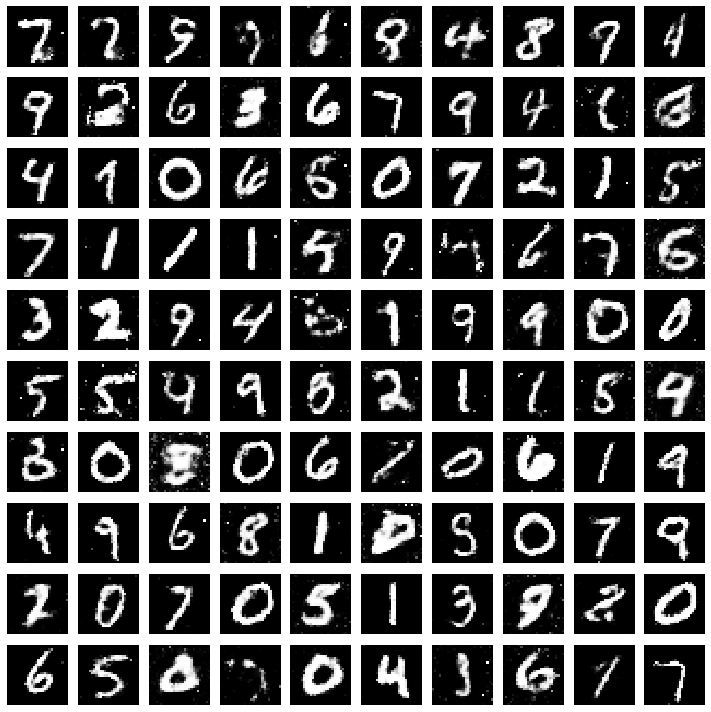

In [ ]:
def training(epochs=400, batch_size=128):
    
    batch_count =int(images_train.shape[0] / batch_size)
        
    for e in range(1,epochs+1 ):
      print('-'*15,'Epoch %d' %e, '-'*15)
      for _ in range(batch_count):
            #generate  random noise as an input to generator
            noise= np.random.normal(0,1, [batch_size, randomDim])

            generated_images = generator.predict(noise)
            image_batch =images_train[np.random.randint(0,images_train.shape[0],size=batch_size)]
            
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            noise= np.random.normal(0,1, [batch_size, randomDim])
            y_gen = np.ones(batch_size)
            
            discriminator.trainable=False
            gloss = gan.train_on_batch(noise, y_gen)
            
      if e == 1 or e % 5 == 0:
          plot_generated_images(e)
training(70,100)

Populating the interactive namespace from numpy and matplotlib


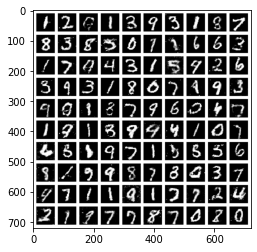

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/gan_generated_image_epoch_50.png')
imgplot = plt.imshow(img)
plt.show()

## **Summary:**

Generator has 3 Dense layers with nuurons count as follows:

*   256 --> 512 --> 1024 --> 784

Discriminator has 3 Dense layers with nuurons count as follows:

*   1024 --> 512 --> 256 --> 1


I have used a learning rate of 0.0002, 60 epochs and batch size=100.